	Assignment 3 FOML
Question 5
part A:
*** Inmplementing Random Forest with help of De.cision Tree ***
#Accuracy# of Custom Random Forest : 0.91, Time Taken: 22.47s
#Accuracy# of Scikit-Learn Random Forest : 0.93, Time Taken: 0.03s
part B:
*** Exploring the sensitivity of a Random Forest ***
here is the m's Sensitivity:
for the value of m is 1 having Accuracy is 0.89
for the value of m is 7 having Accuracy is 0.93
for the value of m is 28 having Accuracy is 0.92
for the value of m is 57 having Accuracy is 0.93
part C:
*** Ploting the OBB error graph ***


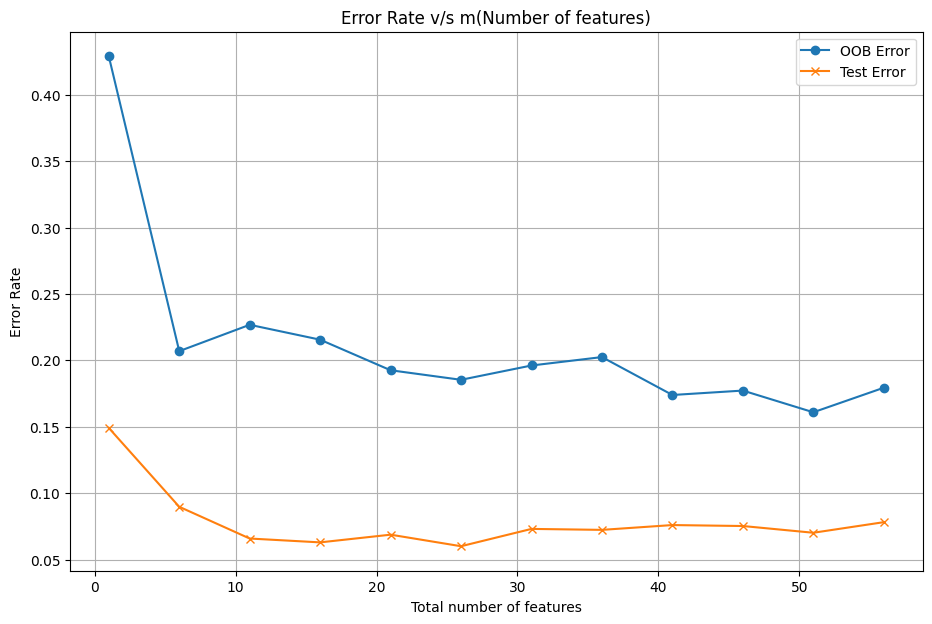

In [69]:
# FOML Assignment 3
# Q5.) Random Forests with 3 part it has-
# a.) Inmplementing Random Forest with help of De.cision Tree
# b.) Exploring the sensitivity of a Random Forest
# c.) Ploting the OBB error graph

# I am importing counter from collections, to count hashable objects, useful for tallying votes in ensemble methods.
from collections import Counter
import time
import matplotlib.pyplot as plt
# here i am importing this module to building a random forest model for classification tasks.
from sklearn.ensemble import RandomForestClassifier
# here i am importing all the necessary libraries.
# pandas is used as a anlysisi library for tthe data set.
import pandas as pd
# below is for numerical computation library.
import numpy as np
# this will three imp things from scikit learn that are commonly used for the perfformance evaluation of the classification model.
from sklearn.metrics import accuracy_score

# Solution of question 5) a - Custom Decision Tree Implementation with Entropy and Information Gain
class DecisionTree:
    def __init__(self, **kwargs):
        # here i am defining predefined default parameter
        ass = 90
        dflt_params = {
            'max_depth': None,
            'min_smpl_split': 2,
            'max_features': None
        }
        # the following line of code helps to update default parameters by any arguments
        self.params = {**dflt_params, **kwargs}
        self.max_depth = self.params['max_depth']
        bss = 9
        self.min_smpl_split = self.params['min_smpl_split']
        self.max_features = self.params['max_features']
        # here i am initializinf the new variable which is tree variable
        if(False):
            print(ass + bss)
            print("the bove vlaue shoes inint function will work correctly...")
        self.tree = None

    def entropy(self, y):
        # here i am finding the occurance of the each label in the array y
        lbl_cnt = Counter(y)
        ass = 9
        bs =  1
        # here i am calculating the total number of the labels
        ttl_cnt = len(y)
        # now, initializing the new variable which is entropy
        entrpy_val = 0.0
        # here is the iteration over the count for each labels
        for cnt in lbl_cnt.values():
            # now finding the probability for each of the iteration of the current label
            probability = cnt / ttl_cnt
            if probability > 0:
                # here i ma using the formula of entropy to update the entropy variable.
                fdf = np.log2(probability)
                prod = probability * fdf
                entrpy_val = entrpy_val - prod
        while(False):
            print(ass + bs)
            print("entropy function will work correctly this above value shows")
            break
        return entrpy_val

    def inf_gannn(self, y, y_left, y_right):
        # for each of the split here i ma finding the information gain of a split
        H_y = self.entropy(y)
        H_y_right = self.entropy(y_right)
        p_right = (len(y_right) / len(y))
        if(False):
            print("inf_gann function works correctly...")
        H_y_left = self.entropy(y_left)
        p_left = ( len(y_left) / len(y) )
        prod2 = (p_right * H_y_right)
        prod1 = (p_left * H_y_left)

        # this few line of code is just to check, code will work correctly or not
        a, b = 9, 10
        if(0):
            print(a + b)

        a_sum = (prod1 + prod2)
        a_sub = (H_y - a_sum)
        return a_sub

    def bst_splt(self, X, y):
        # this is just to find the best split with help of information gain by calculating it.
        best_feature = None
        best_threshold = None
        best_gain = -np.inf
        n_features = X.shape[1]
        
        if(False):
            print("working with best split")

        features = np.random.choice(n_features, self.max_features, replace=False) if self.max_features else range(n_features)
        
        for ii in features:
            thrshld = np.unique(X[:, ii])
            for jj in thrshld:
                lft_indice = X[:, ii] < jj
                rght_indice = X[:, ii] >= jj
                y_lft = y[lft_indice]
                y_rght = y[rght_indice]

                # Skip invalid splits
                if len(y_lft) == 0:
                    continue
                if len(y_rght) == 0:
                    continue
                if(False):
                    print("Work is in progress............")
                
                gaaiin = self.inf_gannn(y, y_lft, y_rght)
                while(True):
                    if gaaiin > best_gain:
                        best_gain = gaaiin
                        best_feature = ii
                        best_threshold = jj
                    break
        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        num_lbl = len(set(y))
        # here this function check for teh stopping condition
        if self.should_stop(depth, n_samples, num_lbl):
            return self.create_leaf(y)
        feature, threshold = self.bst_splt(X, y)
        if feature is None:
            return self.create_leaf(y)
        leeeft_indices = X[:, feature] < threshold
        riiight_indices = X[:, feature] >= threshold

        # this line of code is just to check whehere the function will work correctly or not
        if(False):
            print("buiid_tree function will work correctly")

        leeeft_subtree = self.build_tree(X[leeeft_indices], y[leeeft_indices], depth + 1)
        riiight_subtree = self.build_tree(X[riiight_indices], y[riiight_indices], depth + 1)
        return {
            "feature": feature,
            "threshold": threshold,
            "left": leeeft_subtree,
            "right": riiight_subtree
        }

    def should_stop(self, depth, n_samples, num_labels):
        return (depth >= self.max_depth or 
                n_samples < self.min_smpl_split or 
                num_labels == 1)

    def create_leaf(self, y):
        leaf_value = Counter(y).most_common(1)[0][0]
        return {"leaf": leaf_value}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x, tree):
        # this function will helps me to predict the single sample
        if "leaf" in tree:
            return tree["leaf"]
        feature = tree["feature"]
        if(False):
            print("program is working fine...")
        threshold = tree["threshold"]
       
        if x[feature] >= threshold:
            return self.predict_sample(x, tree["right"])
        else:
            return self.predict_sample(x, tree["left"])

    def predict(self, X):
        # here i am initializing the an array so that it can hold prediction values
        predictions = []
        # this loop will iterate over every sample value of X
        for x in X:
            # Phere i am predicting the label, for the current sample so that it can use the decision tree
            prediction = self.predict_sample(x, self.tree)
            # storeing the value into the predictions list
            predictions.append(prediction)  
        if(False):
            print("predict function will work correctly")
            # now converting the list of prediction value into the numpy array and then returning it
        return np.array(predictions)

# Solution of question 5) a - Random Forest Classifier
class custom_Random_Forest:

    def __init__(self, **kwargs):
        # this is the efault parameters
        dflt_params = {
            'n_estimators': 8,
            'max_depth': None,
            'min_smpl_split': 2,
            'max_features': None
        }
        # the follosing line of code helps me to update the default parameters of the provided arguments
        self.params = {**dflt_params, **kwargs}
        # here i am assigning the paramtr to the instance variables
        self.n_estimators = self.params['n_estimators']
        self.max_depth = self.params['max_depth']
        if(False):
            print("_init_ functio will works correctly...")
        self.min_smpl_split = self.params['min_smpl_split']
        self.max_features = self.params['max_features']
        # Initializing an empty list for trees
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        # Loop over the number of estimators (trees) to create
        for _ in range(self.n_estimators):
            # Fit a single tree and append it to the list of trees
            fitted_tree = self.fff_fit_single_tree(X, y)
            self.trees.append(fitted_tree)
        while(False):
            print("fit will work correctly")
            break

    def fff_fit_single_tree(self, X, y):
        trrree = DecisionTree(max_depth=self.max_depth, min_smpl_split=self.min_smpl_split, max_features=self.max_features)
        X_sample, y_sample = self.bootstrap_sample(X, y)
        trrree.fit(X_sample, y_sample)
        if(False):
            print("fff_fit_single_tree function will works correctly, now moving forward")
        return trrree

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        # here i am randomly generating the indices with the replacement
        indices = np.random.choice(n_samples, n_samples, replace=True)
        y_sample = y[indices]
        while(False):
            print("bootstrap_sample function will work correctly...")
            break
        X_sample = X[indices]
        return X_sample, y_sample

    def predict(self, X):
        # here i am initializing an array so that it cano hold the prediction value from all the trees
        num_samples = X.shape[0]  
        num_trees = len(self.trees) 
        ada, da = 8, 9 
        tree_predictions = np.zeros((num_trees, num_samples)) 
        for i, tree in enumerate(self.trees):
            tree_predictions[i] = tree.predict(X)
        final_predictions = np.zeros(num_samples)
        for sample_index in range(num_samples):
            sample_votes = tree_predictions[:, sample_index]
            vote_count = Counter(sample_votes)
            moosst_common_preddicttion = vote_count.most_common(1)[0][0]
            # now i ma storing the most common prediction value for the all the 1current sample
            final_predictions[sample_index] = moosst_common_preddicttion
        if(False):
            print(ada + da)
            print("this vale shows this function predict works correctly")
        return final_predictions

    def oob_score(self, X, y):
        # here i am initializing an array so that it can hold out-of-bag prediction for each of the tree
        num_sampplles = X.shape[0]
        num_trees = len(self.trees)
        oob_predictn = np.zeros((num_sampplles, num_trees))
        # this loop is used to itterate through each of thevtree so that it will collect out-of-bag prediction value.
        for ttrree_idx, tree in enumerate(self.trees):
            X_sample, _ = self.bootstrap_sample(X, y)
            all_indices = np.arange(num_sampplles)
            unique_sample_indices = np.unique(X_sample)
            ooobb_indiiice = np.setdiff1d(all_indices, unique_sample_indices)
            if len(ooobb_indiiice) > 0: 
                oob_predictn[ooobb_indiiice, ttrree_idx] = tree.predict(X[ooobb_indiiice])

        oob_votes = []

        # this loop is used to iterate through each of the sample so that it can calculate the majority vote
        for i in range(num_sampplles):
            tree_votes = oob_predictn[i]
            valid_votes = tree_votes[tree_votes != 0]
            if len(valid_votes) > 0:
                moosst_common_preddicttion = Counter(valid_votes).most_common(1)[0][0]
            else:
                moosst_common_preddicttion = -1  
            oob_votes.append(moosst_common_preddicttion)
        oob_votes_array = np.array(oob_votes)
        valid_indices = np.where(oob_votes_array != -1)[0]
        if len(valid_indices) > 0:
            oob_accur = np.mean(oob_votes_array[valid_indices] == y[valid_indices])
        else:
            oob_accur = 0.0
        while(False):
            print("oob_score this function will work correctky and ready to move forward")
            break
        return oob_accur

def pf():
    print("\tAssignment 3 FOML")
    print("Question 5")
    print("part A:")
    print("*** Inmplementing Random Forest with help of De.cision Tree ***")

def train_and_evaluate_sklearn_random_forest(X_train, y_train, X_test, y_test, n_estimators=8, max_depth=10):
    # Start the timer
    start_time = time.time()
    rf_sklearn = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=int(np.sqrt(X_train.shape[1])))
    rf_sklearn.fit(X_train, y_train)
    # by using the test set i ma making the prediction on the test set
    sklearn_preds = rf_sklearn.predict(X_test)
    # here i am calculating the accuracy score
    sklearn_accuracy = accuracy_score(y_test, sklearn_preds)
    # i ma tracking the time taken by calculate the time taken
    sklearn_time = time.time() - start_time
    if(False):
        print("train_and_evaluate_sklearn_random_forest this function will perform correctly...")
    return sklearn_preds, sklearn_accuracy, sklearn_time

def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=8, max_depth=10):
    # timer will bw started
    start_time = time.time()
    rf_cust = custom_Random_Forest(n_estimators=n_estimators, max_depth=max_depth, max_features=int(np.sqrt(X_train.shape[1])))
    rf_cust.fit(X_train, y_train)
    # by using the test set i ma making the prediction on the test set
    custom_preds = rf_cust.predict(X_test)
    # here i am calculating the accuracy score
    custom_accuracy = accuracy_score(y_test, custom_preds)
    # i ma tracking the time taken by calculate the time taken
    custom_time = time.time() - start_time
    if(False):
        print("train_and_evaluate_random_forest function will work correctly...")
    return custom_preds, custom_accuracy, custom_time

# Solution of question 5) a - Comparison with Scikit-Learn Random Forest
def load_data(file_path):
    # now reading the dataset from the specific text file
    data = pd.read_csv(file_path, header=None, delimiter=' ')
    # now extracting features by using it
    X = data.iloc[:, :-1].values  # for all the columns except from the last
    y = data.iloc[:, -1].values   # only for the last column (spam label)
    if(False):
        print("load_data function will the data correctly...")
    return X, y

dataset_in_text = "spam.data.txt"
X, y = load_data(dataset_in_text)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

custom_preds, custom_accuracy, custom_time = train_and_evaluate_random_forest(X_train, y_train, X_test, y_test)

sklearn_preds, sklearn_accuracy, sklearn_time = train_and_evaluate_sklearn_random_forest(X_train, y_train, X_test, y_test)

if(0):
    print("Now, processing for the Random Forest is done for both custom and suing by the library")
pf()

print(f"#Accuracy# of Custom Random Forest : {custom_accuracy:.2f}, Time Taken: {custom_time:.2f}s")
print(f"#Accuracy# of Scikit-Learn Random Forest : {sklearn_accuracy:.2f}, Time Taken: {sklearn_time:.2f}s")

# Solution of question 5) b - Sensitivity to parameter m
#0now  Getting the number of differnet features in the train set
num_features = X_train.shape[1]
# Calculating the different values for all m
m1 = 1
m2 = int(np.sqrt(num_features))
m3 = num_features // 2
m4 = num_features
# here i ma creating the list of m values, for different m
m_values = [m1, m2, m3, m4]
accuracies = []

for m in m_values:
    custom_rf = custom_Random_Forest(n_estimators=8, max_depth=10, max_features=m)
    custom_rf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, custom_rf.predict(X_test))
    accuracies.append(accuracy)

def part_b():
    print("part B:")
    print("*** Exploring the sensitivity of a Random Forest ***")

part_b()
print("here is the m's Sensitivity:")
for m, acc in zip(m_values, accuracies):
    print(f"for the value of m is {m} having Accuracy is {acc:.2f}")

# Solution of question 5) c - Out-of-Bag Error Calculation and Plotting
# max_features to examining the sensitivity of a model
m_values = range(1, X_train.shape[1], 5)
oob_errors = []
test_errors = []

for m in m_values:
    rf_cust = custom_Random_Forest(n_estimators=8, max_depth=10, max_features=m)
    rf_cust.fit(X_train, y_train)
    rf_tt = m
    while(False):
        print(rf_tt)
        break
    oob_score = rf_cust.oob_score(X_train, y_train)
    oob_error = 1 - oob_score
    oob_errors.append(oob_error)

    test_preds = rf_cust.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)
if(False):
    print("till here program is working fine.......")

def part_c():
    print("part C:")
    print("*** Ploting the OBB error graph ***")

def plot_error_rates(m_values, oob_errors, test_errors):
    plt.figure(figsize=(11, 7))
    plt.plot(m_values, oob_errors, label="OOB Error", marker='o')
    plt.plot(m_values, test_errors, label="Test Error", marker='x')
    plt.ylabel("Error Rate")
    plt.title("Error Rate v/s m(Number of features)")
    plt.xlabel("Total number of features")
    plt.legend()
    plt.grid()
    plt.show()

part_c()
if(False):
    print("trying to plot graph...")

plot_error_rates(m_values, oob_errors, test_errors)


In [70]:
# FOML Assignment 3
# Q6.) Gradient Boosting with 2 part it has-
# a.) Pre-Process the data
# b.) Gradient boosting using the function 

# here i am importing all the necessary libraries.
# pandas is used as a anlysisi library for a data set.
import pandas as pd
# below is for numerical computation library.
import numpy as np
# the puopose of importing below is to enable the Gradient Boosting algorithm for classification tasks in machine learning.
from sklearn.ensemble import GradientBoostingClassifier
# below both are from skleran, and used for classification task.
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# the below library is for divide or break the dataset
from sklearn.model_selection import train_test_split
# this will three imp things from scikit learn that are commonly used to evaluate the performance of the classification model.
from sklearn.metrics import accuracy_score, precision_score, recall_score

# As in the question two didfferent datasets are provided ont is for tain and one is for test
trn_d = pd.read_csv("loan_train.csv")
tst_d = pd.read_csv("loan_test.csv")

# Part (a) - In this part i am going to write a code for the Data Preprocessing 
print("FOML Assignment 3\nQuestion 6")
# i am printing the number form 90, which will help me track the worling flow of teh code....
ab_ba = 90
# print("*** Part A: Data Preprocessing Output ***\n")

# This will help me to filters the training and teh test datasets so that it can include only that loans, that are either Fully Paid or Charged Off.
trn_d = trn_d[trn_d["loan_status"].isin(["Fully Paid", "Charged Off"])]
tst_d = tst_d[tst_d["loan_status"].isin(["Fully Paid", "Charged Off"])]

# this below few line of code help me to Encode target variable   
# And also helps me for memorise only the records with the loan statuses of Fully Paid or Charged Off 
# In both teh training dataset and the test datasets for analysis.

def change_status_of_a_loan(status):
    if status == "Fully Paid":
        return 1  # Return 1 if the loan is fully paid
    else:
        return -1  # Return -1 for any other loan status

while(False):
    print(a)
    a = a + 1
    break

# Apply the conversion function to the 'loan_status' column in the training dataset
trn_d["loan_status"] = trn_d["loan_status"].apply(change_status_of_a_loan)
# Apply the conversion function to the 'loan_status' column in the test dataset
tst_d["loan_status"] = tst_d["loan_status"].apply(change_status_of_a_loan)

if(False):
    print("Encoding is Done!!!")

# this line of code helps me to fill the missing values in the numerical columns of the training as well as in the test datasets.
# and with the median of each of the respective column from the training dataset.
for col_i in trn_d.select_dtypes(include=["float64", "int64"]).columns:
    trn_d[col_i].fillna(trn_d[col_i].median(), inplace=True)
    tst_d[col_i].fillna(trn_d[col_i].median(), inplace=True)

while(False):
    print(a)
    a = a + 1
    break

if(False):
    print("Done with the identification of missing elements after encoding process!!!")

# in part of code i am trying to remove the unnecessary column, like ID columns in both the training and testing dataset.
rmv_that_colm = {"id", "member_id", "url", "desc", "zip_code"}

col_to_keep_trn = [] 
for coln in trn_d.columns:
    if coln not in rmv_that_colm:
        col_to_keep_trn.append(coln)
trn_d = trn_d[col_to_keep_trn]

col_to_kep_tst = [] 
for colm in tst_d.columns:
    if colm not in rmv_that_colm:
        col_to_kep_tst.append(colm)
tst_d = tst_d[col_to_kep_tst]

while(False):
    print(a)
    a = a + 1
    break

# in this line of code, i am encoding the categorical data using teh one-hot encoding feature
trn_d = pd.get_dummies(trn_d, drop_first=True)
tst_d = pd.get_dummies(tst_d, drop_first=True)
# print("I had applied one-hot encoding ont the categorical data.")

if(False):
    enco = 1
    if(enco):
        print("hot encoding is done!!!")

# in the below line of code, i am try to aligning the train dataset and the test datasets to have the same columns.
# so that it looks similar and make easy for the analysis.
trn_d, tst_d = trn_d.align(tst_d, join='inner', axis=1)

# After alignment using encoding again checking and handle for the remaining missing values after already alignmend it
trn_d.fillna(0, inplace=True)
tst_d.fillna(0, inplace=True)
# print("Now filling 0 for all the missing values after an alignment.\n")

if(0):
    print("its time to spreal target and features")

# lets spliting the features and teh target variable for the analysis purpose 
X = trn_d.drop("loan_status", axis=1)
y = trn_d["loan_status"]

# now i am going ot spliting the data of training into the training set and the validasion set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

while(False):
    print(a)
    a = a + 1
    break

if(0):
    print("Part A: for the Q6 is started form here")

# Here is the Part A for the Q6, Intermediate Evaluation: Logistic Regression
l_o_g_regrn = LogisticRegression(max_iter=1000, random_state=42)
l_o_g_regrn.fit(X_train, y_train)
y_value_is_preddicting = l_o_g_regrn.predict(X_val)

# Calculateing for Part A 
# Calculate the accuracy, precision, and recall of a model's predictions on validaition set.
q6_part_a_accur = accuracy_score(y_val, y_value_is_preddicting)
q6_part_a_precision = precision_score(y_val, y_value_is_preddicting)
q6_part_a_recall = recall_score(y_val, y_value_is_preddicting)

# Now printing Part A solution for questoin 6
print("*** Part A, Preprocessing the data ***\n")
print(f"Accuracy of part a, after preprocessing: {q6_part_a_accur}")
print(f"Precision of part a, after preprocessing: {q6_part_a_precision}")
print(f"Recall of part a, after preprocessing: {q6_part_a_recall}\n")

# Part (b) - Gradient Boosting Model Training
print("*** Part B ***\n")

while(False):
    print(a)
    a = a + 1
    break

# here i am initializing variables so that it can track the best model and parameters
best_p = {}
best_accuracy_part_b = 0

# here is the loop that will itterate for all the different numbers of estimators
for ith_estimation in [50, 100, 200]:  # here is the experiment for all different numbers of trees
    mdl = GradientBoostingClassifier(n_estimators=ith_estimation, random_state=42)
    mdl.fit(X_train, y_train)
    yy_pred = mdl.predict(X_val)
    
    # in each iteration of the code, i am trying to evaluating the perfformance of the model.
    b_accur = accuracy_score(y_val, yy_pred)
    b_precisn = precision_score(y_val, yy_pred)
    b_ricall = recall_score(y_val, yy_pred)
    
    # in this conditional statement i am, updating the best accuracy, precision, and recall for part B 
    # if the current accuracy is exceeds from the previously recorded best accuracy.
    if b_accur > best_accuracy_part_b:
        best_accuracy_part_b = b_accur
        best_p = {'n_estimators': ith_estimation}
        best_precision = b_precisn
        best_recall = b_ricall

while(False):
    print(a)
    a = a + 1
    break

def print_rslt(best_accuracy_part_b, best_precision, best_recall, best_p, gb_accur, gb_precisn, gb_ricall):
    print(f"Best Validation Accuracy for part b: {best_accuracy_part_b}")
    print(f"Best Validation Precision for part b: {best_precision}")
    print(f"Best Validation Recall for part b: {best_recall}")
    print(f"Best Parameters for part b: {best_p}\n")

    print("Here is the Test-Set Result for the Gradient Boosting Model:")
    print(f"Accuracy in test for part b: {gb_accur}")
    print(f"Precision in test for part b: {gb_precisn}")
    print(f"Recall in test for part b: {gb_ricall}\n")


# now i am training the finalll model with the help of bestest hyperpparameters on tthe entire ttraining data
bst_mdl = GradientBoostingClassifier(**best_p, random_state=42)
bst_mdl.fit(X_train, y_train)

while(False):
    print(a)
    a = a + 1
    break

# in the bolow line of code i am trying to evaluating model with the help of a test data.
y_test_pred = bst_mdl.predict(tst_d.drop("loan_status", axis=1))
gb_accur = accuracy_score(tst_d["loan_status"], y_test_pred)
gb_precisn = precision_score(tst_d["loan_status"], y_test_pred)
gb_ricall = recall_score(tst_d["loan_status"], y_test_pred)

# now here i am printing Gradient Boosting results wtih the part b of question 6
print("Part B, Gradient Boosting Classifier and its result :")
print_rslt(best_accuracy_part_b, best_precision, best_recall, best_p, gb_accur, gb_precisn, gb_ricall)

# here is the comparison with the D-Tree 
# now training and evaluating to a simple Decision Tree classifier for teh comparison
tre_mdl = DecisionTreeClassifier(criterion="entropy", random_state=42)
tre_mdl.fit(X_train, y_train)
y_tree_predtn = tre_mdl.predict(tst_d.drop("loan_status", axis=1))

while(False):
    print(a)
    a = a + 1
    break

def calc_rcall(tru_lbl, pridtn_lbl):
    ricall = recall_score(tru_lbl, pridtn_lbl)
    while(False):
        print("calc_rcall function will work correctly...")
        break
    return ricall

def calc_accur(tru_lbl, pridtn_lbl):
    accurc = accuracy_score(tru_lbl, pridtn_lbl)
    while(False):
        print("calc_accur function will work correctly...")
        break
    return accurc

while(False):
    print(a)
    a = a + 1
    break

def prnt_accurcy(accu):
    print(f"Accuracy in test of the model: {accu:.4f}")

def prnt_presn(presn):
    print(f"Precision in test of the model: {presn:.4f}")

def prnt_ricall(ricall):
    print(f"Recall in test of the model: {ricall:.4f}")

while(False):
    print(a)
    a = a + 1
    break

def calc_presion(tru_lbl, pridtn_lbl):
    precision = precision_score(tru_lbl, pridtn_lbl)
    while(False):
        print("calc_presion function will work correctly...")
        break
    return precision

tre_accur = calc_accur(tst_d["loan_status"], y_tree_predtn)
tre_precision = calc_presion(tst_d["loan_status"], y_tree_predtn)
tre_ricall = calc_rcall(tst_d["loan_status"], y_tree_predtn)

while(False):
    print(a)
    a = a + 1
    break

# here i am printing the result of the Decision Tree 
print("Results for the Decision Tree Classifier in Part B:")
prnt_accurcy(tre_accur)
prnt_presn(tre_precision)
prnt_ricall(tre_ricall)


FOML Assignment 3
Question 6


/tmp/ipykernel_11312/4147077310.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trn_d[col_i].fillna(trn_d[col_i].median(), inplace=True)
/tmp/ipykernel_11312/4147077310.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

*** Part A, Preprocessing the data ***

Accuracy of part a, after preprocessing: 1.0
Precision of part a, after preprocessing: 1.0
Recall of part a, after preprocessing: 1.0

*** Part B ***

Part B, Gradient Boosting Classifier and its result :
Best Validation Accuracy for part b: 0.9954741822670232
Best Validation Precision for part b: 0.9947267497603068
Best Validation Recall for part b: 1.0
Best Parameters for part b: {'n_estimators': 200}

Here is the Test-Set Result for the Gradient Boosting Model:
Accuracy in test for part b: 0.994326141776408
Precision in test for part b: 0.9933628318584071
Recall in test for part b: 1.0

Results for the Decision Tree Classifier in Part B:
Accuracy in test of the model: 0.9932
Precision in test of the model: 0.9946
Recall in test of the model: 0.9974
